In [5]:
### import the neccessary libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the COVID-19 dataset
# Replace with the path to the file
file_path = "https://raw.githubusercontent.com/QueenSekinah/COVID-19_project_grp_6/main/full_grouped%20-%20full_grouped.csv"

covid_data = pd.read_csv(file_path)

# List of countries for your group - replace with the list for your group
group_six_countries = ['Sri Lanka', 'Sudan', 'Suriname', 'Sweden', 'Switzerland', 'Syria',
                   'Taiwan*', 'Tajikistan', 'Tanzania', 'Thailand', 'Timor-Leste',
                   'Togo', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'US', 'Uganda',
                   'Ukraine', 'United Arab Emirates', 'United Kingdom', 'Uruguay',
                   'Uzbekistan', 'Venezuela', 'Vietnam', 'West Bank and Gaza',
                   'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe']

# Filter the COVID-19 data for the countries assigned to your group
group_data = covid_data[covid_data['Country/Region'].isin(group_six_countries)]

# Display the filtered data for Group Six
print(group_data.head(5))

           Date Country/Region  Confirmed  Deaths  Recovered  Active  \
158  2020-01-22      Sri Lanka          0       0          0       0   
159  2020-01-22          Sudan          0       0          0       0   
160  2020-01-22       Suriname          0       0          0       0   
161  2020-01-22         Sweden          0       0          0       0   
162  2020-01-22    Switzerland          0       0          0       0   

     New cases  New deaths  New recovered             WHO Region  
158          0           0              0        South-East Asia  
159          0           0              0  Eastern Mediterranean  
160          0           0              0               Americas  
161          0           0              0                 Europe  
162          0           0              0                 Europe  


### Questions to address with/in the data

- Data Cleaning:
1. Are there any missing values in the dataset? If so, how are they handled?
2. Are there any inconsistencies or anomalies in the data that need to be addressed?

- Grouping:
1. What is the total number of confirmed cases, deaths, and recoveries for each country in the dataset?
2. How does the distribution of COVID-19 cases vary across different countries?

- Pivot Tables:
1. Can you create a pivot table to show the total number of confirmed cases, deaths, and recoveries for each date and country?

- Time Series Analysis:
1. How has the number of confirmed cases changed over time for each country?
2. Are there any noticeable trends or patterns in the data?

- Plotting with Matplotlib/Seaborn:
1. Can you create a line plot showing the trend of confirmed cases over time for a specific country?
2. How does the number of confirmed cases compare between different countries? Can you visualize this comparison using a bar plot or a heatmap?

- Bonus:
1. Are there any outliers in the dataset that might indicate errors or anomalies?
2. Can you perform any additional analyses or visualizations that provide insights into the COVID-19 data for your assigned countries?

In [34]:
#Data Cleaning 

df = pd.read_csv("https://raw.githubusercontent.com/QueenSekinah/COVID-19_project_grp_6/main/full_grouped%20-%20full_grouped.csv")

##Checking for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

#Remove rows with missing values

df = df.dropna()

Missing values:
 Date              0
Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
Active            0
New cases         0
New deaths        0
New recovered     0
WHO Region        0
dtype: int64


Total Cases, Deaths, and Recoveries by Country:
                       Confirmed    Deaths  Recovered
Country/Region                                      
Sri Lanka                166865      1105     109389
Sudan                    586392     35415     240835
Suriname                  32247       721      17436
Sweden                  4973160    448913          0
Switzerland             3696604    207858    2957883
Syria                     20946       973          0
Taiwan*                   55593       840      42184
Tajikistan               383026      3915     264000
Tanzania                  49327      1985      16729
Thailand                 366527      6289     312360
Timor-Leste                2487         0          0
Togo                      47390      1295      28330
Trinidad and Tobago       14967       949      10531
Tunisia                  126590      5250      85410
Turkey                 17903345    466056   13345389
US                    224345948  11011411   563534

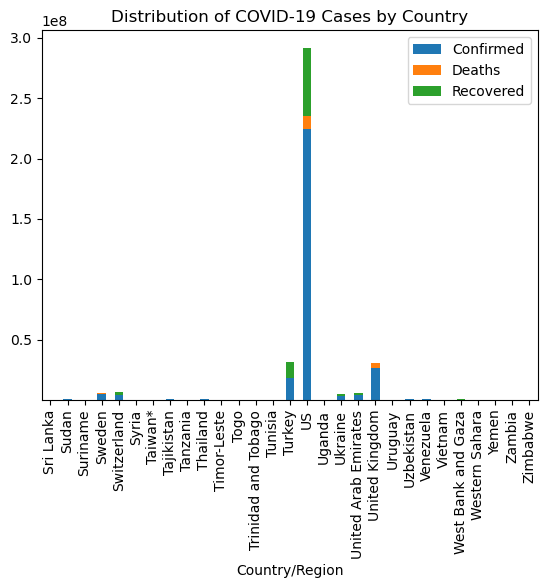

In [38]:
# Grouping part
### Grouping by country and calculating totals
#What is the total number of confirmed cases, deaths, and recoveries for each country in the dataset?

country_totals = group_data.groupby('Country/Region').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})
print("Total Cases, Deaths, and Recoveries by Country:\n", country_totals)


#How does the distribution of COVID-19 cases vary across different countries?
# Visualizing the distribution of COVID-19 cases using a bar plot

country_totals.plot(kind='bar', stacked=True)
plt.title('Distribution of COVID-19 Cases by Country')
plt.show()

In [47]:
#Pivot Tables:
##Creating a pivot table to show the total number of confirmed cases, deaths, and recoveries for each date and country

date_country_pivot = pd.pivot_table(group_data, values=['Confirmed', 'Deaths', 'Recovered'], index=['Date', 'Country/Region'], aggfunc='sum')
print(date_country_pivot)

                               Confirmed  Deaths  Recovered
Date       Country/Region                                  
2020-01-22 Sri Lanka                   0       0          0
           Sudan                       0       0          0
           Suriname                    0       0          0
           Sweden                      0       0          0
           Switzerland                 0       0          0
...                                  ...     ...        ...
2020-07-27 West Bank and Gaza      10621      78       3752
           Western Sahara             10       1          8
           Yemen                    1691     483        833
           Zambia                   4552     140       2815
           Zimbabwe                 2704      36        542

[5452 rows x 3 columns]


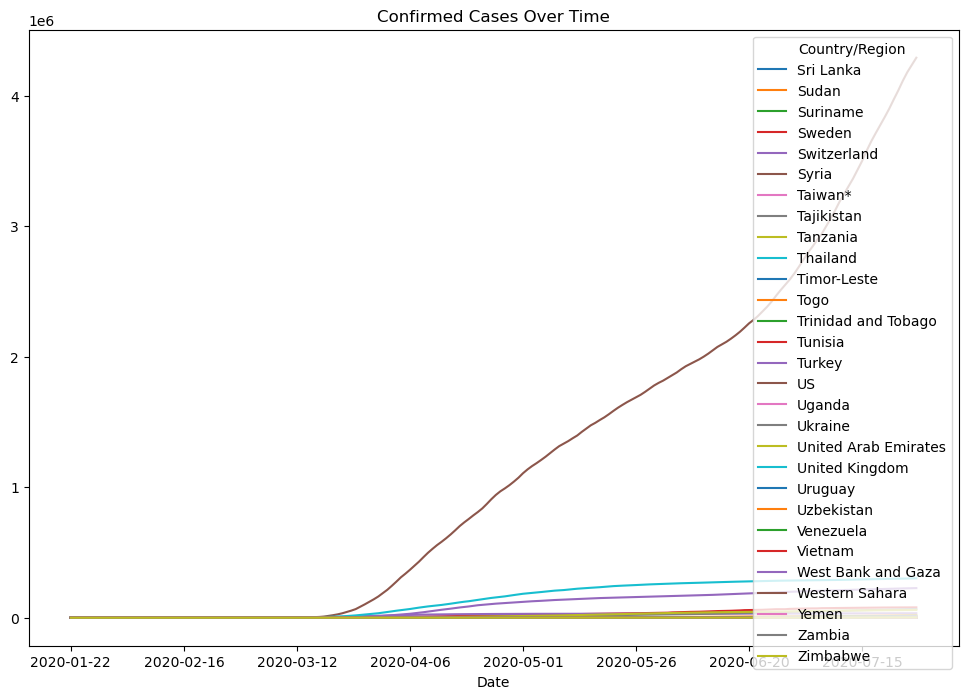

In [46]:
#Time Series Analysis
#How the number of confirmed cases changed over time for each country
#Visualization of the time series data
time_series_plot = group_data.pivot(index='Date', columns='Country/Region', values='Confirmed').plot(figsize=(12, 8))
plt.title('Confirmed Cases Over Time')
plt.show()


In [ ]:
# Time Series B: Are there any noticeable trends or patterns in the data

# Yes there are noticeable changes in the trend

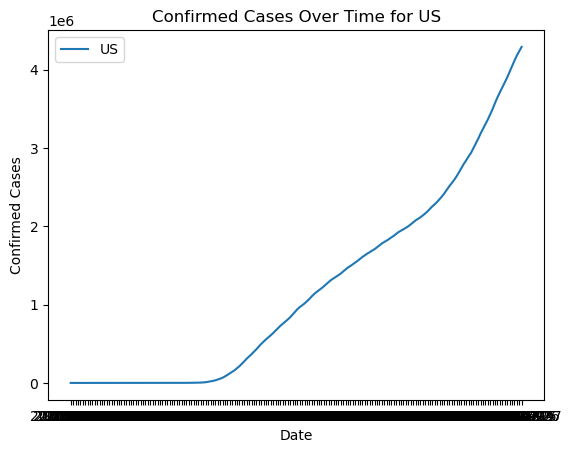

In [48]:
# Plotting with Matplotlib/Seaborn:
## Creating a line plot showing the trend of confirmed cases over time for a specific country

# Selecting a specific country (e.g., 'US') for the line plot

specific_country_data = group_data[group_data['Country/Region'] == 'US']
plt.plot(specific_country_data['Date'], specific_country_data['Confirmed'], label='US')
plt.title('Confirmed Cases Over Time for US')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.show()

In [ ]:
# How the number of confirmed cases compare between different countries


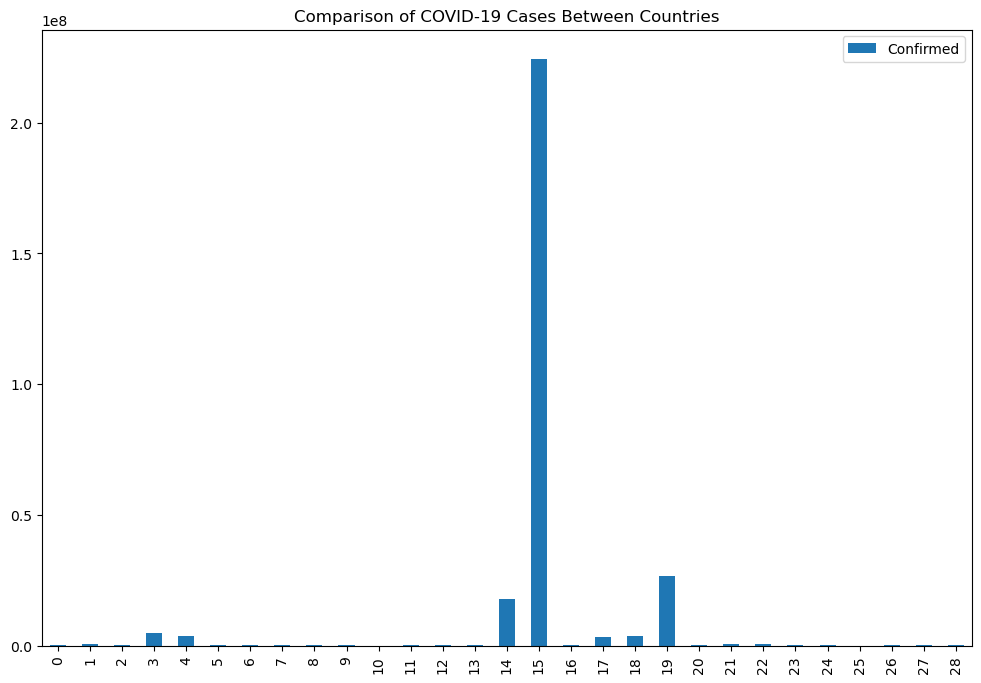

In [9]:
# Visualizing this comparison using a barchat
comparison_plot = country_totals.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Comparison of COVID-19 Cases Between Countries')
plt.show()

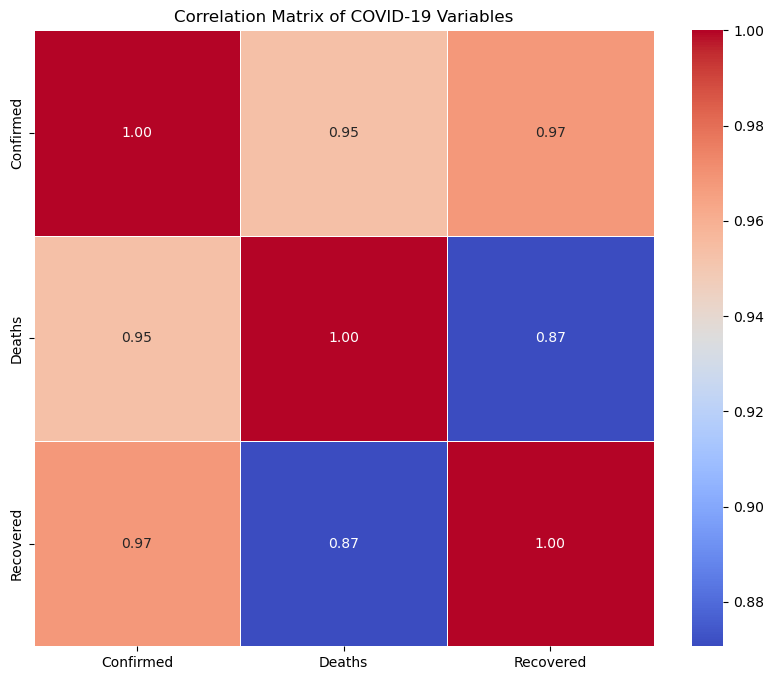

In [10]:
#Bonus Tasks

# Select relevant columns for correlation analysis
correlation_data = group_data[['Confirmed', 'Deaths', 'Recovered']]

# Calculate correlation matrix
correlation_matrix = correlation_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of COVID-19 Variables')
plt.show()